In [1]:
import sys
sys.path.append('../')
import env

In [2]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression as LR
from sklearn.preprocessing import PolynomialFeatures

In [3]:
READ_FILE = '2D'

In [4]:
times_list = env.TIMES_LIST()

In [5]:
csv_array = {}
def main(args, array):
    df = pd.read_csv(env.get_full_path(READ_FILE, args))
    array[args.dir][args.ratio][args.seed][args.csv] = df.copy()
    
env.for_default_init(main, csv_array, ['census1', 'census2', 'mobile', 'census'])

In [6]:
target1 = 'mobile'
target2 = 'census'

# 全体の回帰直線

https://pythondatascience.plavox.info/scikit-learn/%E5%9B%9E%E5%B8%B0%E3%83%A2%E3%83%87%E3%83%AB%E3%81%AE%E8%A9%95%E4%BE%A1　　

よりR2はxに実測値、yに真値

なのでここでのR2算出方法は間違っている　　

0.3779114162281638


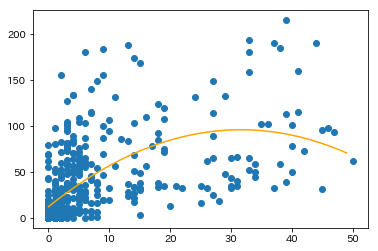

In [7]:
_dir = 'p10000'
_ratio = 'r4'
_seed = 's123'

df = csv_array[_dir][_ratio][_seed].copy()
trainX = df[target1]['people'].values.reshape(-1, 1)
trainY = df[target2]['people'].values.reshape(-1, 1)

quadratic = PolynomialFeatures(degree = 2)
X_quad = quadratic.fit_transform(trainX)
X_fit = np.arange(trainX.min(), trainX.max(), 1)[:, np.newaxis]
model = LR()

# 2次の項を追加、予測値、R^2を評価
mod_quad = model.fit(X_quad, trainY)
y_quad_fit = mod_quad.predict(quadratic.fit_transform(X_fit))
r2_quad = model.score(X_quad, trainY)

# plt.figure(dpi=600)
plt.scatter(trainX, trainY)
plt.plot(X_fit, y_quad_fit, 'orange')
print(r2_quad)

# plt.savefig('correlation_{0}.png'.format(_dir+_ratio))

In [8]:
# xとy両方とも0の値を削除
def remove_dual_zeros(x_array, y_array):
    new_x_array = []
    new_y_array = []
    
    for x, y in zip(x_array, y_array):
        if x == 0 and y == 0:
            continue
        else:
            new_x_array.append(x)
            new_y_array.append(y)

    return pd.Series(new_x_array), pd.Series(new_y_array)

In [9]:
csv_array_3d = {}
def create3d(args, array):
    df = pd.read_csv(env.get_full_path(READ_FILE, args))
    df['time'] = df['time'].apply(lambda x: str(int(x)))
    group_list = df.groupby(['time'], sort=False)
    for _times, _group in group_list:
#         df = convert_area_to_contour(base.copy(), _group.copy())
        df = df.sort_index(ascending=False)
        array[args.dir][args.ratio][args.seed][args.csv][_times] = _group

env.for_default_init(create3d, csv_array_3d)

p10000 r4 s123 3600  [R^2 =  0.426 ]
p10000 r4 s123 7200  [R^2 =  0.316 ]
p10000 r4 s123 10800  [R^2 =  0.298 ]
p10000 r4 s123 14400  [R^2 =  0.312 ]
p10000 r4 s123 18000  [R^2 =  0.234 ]
p10000 r4 s123 21600  [R^2 =  0.218 ]


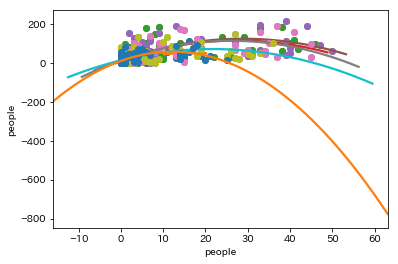

In [10]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score
import seaborn as sns

for_list = env.get_for_list()
for _dir in for_list.dir:
    for _ratio in for_list.ratio:
        for _seed in for_list.seed:
            for _times in times_list:
                df = csv_array_3d[_dir][_ratio][_seed].copy()
                trainX = df[target1][_times]['people'].copy()
                trainY = df[target2][_times]['people'].copy()

                # plt.figure(dpi=600)
                plt.plot(trainX, trainY, 'o')

                order=2
                sns.regplot(x=trainX, y=trainY, order=order, ci=0)
                z = np.polyfit(trainX, trainY, order)
                z = np.squeeze(z)
                p = np.poly1d(z)
            #     print('y = ', p)
                corr = np.corrcoef(trainX, trainY)[0,1]
#                 print('相関 = ', round(corr, 4))

                trainX = trainX.values.reshape(-1, 1)
                trainY = trainY.values.reshape(-1, 1)
                model = LR()
                model.fit(trainX, trainY)            
                score = model.score(trainX, trainY)
                
                print(_dir, _ratio, _seed, _times, ' [R^2 = ', round(score, 3), ']')
                p = np.asanyarray(p)

                x = trainX
                y = p[0]*x**2 + p[1]*x + p[2]


                # plt.savefig('correlation_{0}.png'.format(people))

In [11]:
# for _dir in ['p30000']:
#     for _ratio in ['r6']:
#         for _seed in ['s123']:
#             for _times in ['3600']:
#                 df = csv_array_3d[_dir][_ratio][_seed].copy()
#                 trainX = df['od'][_times]['people'].copy()
#                 trainY = df['census'][_times]['people'].copy()

#                 # plt.figure(dpi=600)
#                 plt.plot(trainX, trainY, 'o')

#                 order=2
#                 sns.regplot(x=trainX, y=trainY, order=order, ci=0)
#                 z = np.polyfit(trainX, trainY, order)
#                 z = np.squeeze(z)
#                 p = np.poly1d(z)
#             #     print('y = ', p)
#                 corr = np.corrcoef(trainX, trainY)[0,1]
# #                 print('相関 = ', round(corr, 4))

#                 trainX = trainX.values.reshape(-1, 1)
#                 trainY = trainY.values.reshape(-1, 1)
#                 model = LR()
#                 model.fit(trainX, trainY)            
#                 score = model.score(trainX, trainY)
                
#                 print(_dir, _ratio, _seed, _times, ' [R^2 = ', round(score, 3), ']')
#                 p = np.asanyarray(p)

#                 x = trainX
#                 y = p[0]*x**2 + p[1]*x + p[2]


#                 # plt.savefig('correlation_{0}.png'.format(people))

参考: http://tekenuko.hatenablog.com/entry/2016/09/19/193520

0.3779114162281638


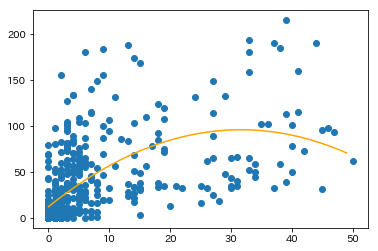

In [27]:
from sklearn.preprocessing import PolynomialFeatures

score_array = []
for_list = env.get_for_list()
for _dir in for_list.dir:
    for _ratio in for_list.ratio:
        for _seed in for_list.seed:

            df = csv_array[_dir][_ratio][_seed].copy()
            trainX = df[target1]['people'].values.reshape(-1, 1)
            trainY = df[target2]['people'].values.reshape(-1, 1)

            quadratic = PolynomialFeatures(degree = 2)
            X_quad = quadratic.fit_transform(trainX)
            X_fit = np.arange(trainX.min(), trainX.max(), 1)[:, np.newaxis]
            model = LR()

            # 2次の項を追加、予測値、R^2を評価
            mod_quad = model.fit(X_quad, trainY)
            y_quad_fit = mod_quad.predict(quadratic.fit_transform(X_fit))
            r2_quad = model.score(X_quad, trainY)
            score_array.append(r2_quad)

#             plt.figure(figsize=(9,6), dpi=600)
            plt.scatter(trainX, trainY)
            plt.plot(X_fit, y_quad_fit, 'orange')
#             plt.savefig('p10000r4s123m_c.png')
            print(r2_quad)

In [13]:
tmp = 0
for score in score_array:
    tmp += score
tmp/len(score_array)

0.3779114162281638